# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

from plotly import plotly
import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

C:\Users\RASHU TYAGI\Anaconda3\lib\site-packages\smart_open\ssh.py:34: UserWarning: paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress
  warnings.warn('paramiko missing, opening SSH/SCP/SFTP paths will be disabled.  `pip install paramiko` to suppress')


## 1.1 Reading Data

In [3]:
project_data = pd.read_csv(r'D:\Rashu Studies\AppliedAICourse\Assignments\Mandatory Assignments\Mandatory Assignment 3 Donors Choose KNN\train_data.csv')
resource_data = pd.read_csv(r'D:\Rashu Studies\AppliedAICourse\Assignments\Mandatory Assignments\Mandatory Assignment 3 Donors Choose KNN\resources.csv')

In [4]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109248, 17)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects' 'project_is_approved']


In [5]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
55660        8393  p205479  2bf07ba08945e5d8b2a3f269b2b3cfe5           Mrs.   
76127       37728  p043609  3f60494c61921b3b43ab61bdde2904df            Ms.   

      school_state                Date project_grade_category  \
55660           CA 2016-04-27 00:27:36          Grades PreK-2   
76127           UT 2016-04-27 00:31:25             Grades 3-5   

      project_subject_categories            project_subject_subcategories  \
55660             Math & Science  Applied Sciences, Health & Life Science   
76127              Special Needs                            Special Needs   

                                      project_title  \
55660  Engineering STEAM into the Primary Classroom   
76127                       Sensory Tools for Focus   

                                         project_essay_1  \
55660  I have been fortunate enough to use the Fairy ...   
76127  Imagine being 8-9 years old. You're in your th...   

                                         project_essay_2  \
55660  My students come from a variety of backgrounds...   
76127  Most of my students have autism, anxiety, anot...   

                                         project_essay_3  \
55660  Each month I try to do several science or STEM...   
76127  It is tough to do more than one thing at a tim...   

                                         project_essay_4  \
55660  It is challenging to develop high quality scie...   
76127  When my students are able to calm themselves d...   

                                project_resource_summary  \
55660  My students need STEM kits to learn critical s...   
76127  My students need Boogie Boards for quiet senso...   

       teacher_number_of_previously_posted_projects  project_is_approved  
55660                                            53                    1  
76127                                             4                    1

In [6]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


id                                        description  quantity  \
0  p233245  LC652 - Lakeshore Double-Space Mobile Drying Rack         1   
1  p069063        Bouncy Bands for Desks (Blue support pipes)         3   

    price  
0  149.00  
1   14.95

## NOW THE MOST IMPORTANT THING HERE IS THAT YOU SHOULD SPLIT OUR DATA INTO TRAIN AND TEST BEFORE APPLYING ANY FIT TECHNIQUE LIKE BOW OR TFIDF BECAUSE OTHEREWISE THERE WILL BE DATA LEAKAGE PROBLEM.ALSO FOR PREPROCESSING LIKE STANDARDIZATION AND NORMALIZATION ALSO WE SHOULD KEEP IN MIND THAT TRAIN TEST SPLIT SHOULD BE DONE BEFORE APPLYING THOSE PREPROCESSING TECHNIQUES

In [7]:
# REFER THIS SOUNDCLOUD LINK : https://soundcloud.com/applied-ai-course/leakage-bow-and-tfidf

# Train_Test Split

In [8]:
# train test split
# note that here This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.
#For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(project_data, project_data['project_is_approved'], test_size=0.33, stratify = project_data['project_is_approved'])

# now getting the crossvalidation data from our train data
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [9]:
# Now we will be removing the column "project_is_approved" because that is the only one which our model needs to predict

X_train.drop(['project_is_approved'], axis=1, inplace=True)
X_test.drop(['project_is_approved'], axis=1, inplace=True)
X_cv.drop(['project_is_approved'], axis=1, inplace=True)


### Now we will do all kind of preprocessing required for the train data ,test data,crossvalidation data separately

## FOR TRAIN DATA

##  Preprocessing of `project_subject_categories'

In [10]:
catogories = list(X_train['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_train['clean_categories'] = cat_list
X_train.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_train['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## Preprocessing of  project_subject_subcategories

In [11]:
sub_catogories = list(X_train['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_train['clean_subcategories'] = sub_cat_list
X_train.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_train['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text preprocessing

In [12]:
# merge two column text dataframe: 
X_train["essay"] = X_train["project_essay_1"].map(str) +\
                        X_train["project_essay_2"].map(str) + \
                        X_train["project_essay_3"].map(str) + \
                        X_train["project_essay_4"].map(str)

In [13]:
X_train.head(2)

Unnamed: 0       id                        teacher_id teacher_prefix  \
8134       135883  p090948  ade6aad520456e6e23490918ef5ea2d4            Ms.   
32738      113417  p140603  e37e94882ace7b10b482892d78787fa4            Ms.   

      school_state                Date project_grade_category  \
8134            CA 2016-08-02 15:09:47             Grades 3-5   
32738           CA 2016-11-23 15:24:17             Grades 3-5   

                       project_title  \
8134   Help Build Our Writing Center   
32738       Little Black Chrome Book   

                                         project_essay_1  \
8134   As a teacher in a high-poverty school, I have ...   
32738  I teach a diverse group of 5th graders in a hi...   

                                         project_essay_2 project_essay_3  \
8134   Writing is a critical part of 5th grade. It is...             NaN   
32738  Today's 5th-grade students must interact with ...             NaN   

      project_essay_4                           project_resource_summary  \
8134              NaN  My students need materials to facilitate their...   
32738             NaN  My students need 3 Chrome Books to see the pos...   

       teacher_number_of_previously_posted_projects  \
8134                                              3   
32738                                             9   

                       clean_categories                   clean_subcategories  \
8134                  Literacy_Language                    Literature_Writing   
32738  History_Civics Literacy_Language  History_Geography Literature_Writing   

                                                   essay  
8134   As a teacher in a high-poverty school, I have ...  
32738  I teach a diverse group of 5th graders in a hi...

In [14]:
# printing some random reviews
print(X_train['essay'].values[0])
print("="*50)
print(X_train['essay'].values[150])
print("="*50)
print(X_train['essay'].values[1000])
print("="*50)
print(X_train['essay'].values[20000])
print("="*50)
print(X_train['essay'].values[9999])
print("="*50)

As a teacher in a high-poverty school, I have the unique opportunity to work with a group of thirty-three students from varying backgrounds who all contribute unique skills and experiences to our classroom.\r\n\r\nOur class is made up of a multilingual and global community of learners, with over half the class speaking a language other than English at home.\r\n\r\nThese bright, innovative, spunky students are enthusiastic readers, writers, mathematicians, scientists and historians. Many students do not have access to writing materials at home and would greatly benefit from having access to a rich writing center from which they can easily build the worlds and ideas that are just waiting to be put down on paper.Writing is a critical part of 5th grade. It is the beginning of the 5 paragraph essay, and my students will be doing a lot of work researching different topics and developing their own persuasive essays. They will also have an opportunity to write a memoir at the end of the school

In [15]:
# creating a function named as decontracted which does the job of decontraction

# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [16]:
sent = decontracted(X_train['essay'].values[20000])
print(sent)
print("="*50)

My students are brand new students - kindergarten students with such an eagerness to learn.  We are located on a military installation and have students from all over the country and/or world.  My students are diverse and bright.  Some of these students do not have access to technology at home and look forward to the time that is given in class to explore technology and all the fun (and academic) things that we can do with it.  Our goal is not only to learn, but to have fun doing so.Some of my students do not have access to technology at home and we would like to enhance student learning by adding tablets to our classroom resources.  With these tablets, the students will be able to access educational games that are paired with our curriculum and will expand their learning.  Students will be able to practice using technology while listening to a book online, reading an e-book, playing math games, looking at pictures of famous presidents, and so much more.  The possibilities are endless 

In [17]:
#\r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are brand new students - kindergarten students with such an eagerness to learn.  We are located on a military installation and have students from all over the country and/or world.  My students are diverse and bright.  Some of these students do not have access to technology at home and look forward to the time that is given in class to explore technology and all the fun (and academic) things that we can do with it.  Our goal is not only to learn, but to have fun doing so.Some of my students do not have access to technology at home and we would like to enhance student learning by adding tablets to our classroom resources.  With these tablets, the students will be able to access educational games that are paired with our curriculum and will expand their learning.  Students will be able to practice using technology while listening to a book online, reading an e-book, playing math games, looking at pictures of famous presidents, and so much more.  The possibilities are endless 

In [18]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are brand new students kindergarten students with such an eagerness to learn We are located on a military installation and have students from all over the country and or world My students are diverse and bright Some of these students do not have access to technology at home and look forward to the time that is given in class to explore technology and all the fun and academic things that we can do with it Our goal is not only to learn but to have fun doing so Some of my students do not have access to technology at home and we would like to enhance student learning by adding tablets to our classroom resources With these tablets the students will be able to access educational games that are paired with our curriculum and will expand their learning Students will be able to practice using technology while listening to a book online reading an e book playing math games looking at pictures of famous presidents and so much more The possibilities are endless by adding technology to 

In [19]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not' 
# because although they are in this list but they matter a lot because
# they change the meaning of the entire sentence.
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [20]:
# Combining all the above preprocessing techniques for all the project essays
from tqdm import tqdm
preprocessed_essays_Train = []
# tqdm is for printing the status bar
for sentance in tqdm(X_train['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Train.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:21<00:00, 2256.99it/s]


In [21]:
# after preprocesing of project essays
preprocessed_essays_Train[20000]

'students brand new students kindergarten students eagerness learn located military installation students country world students diverse bright students not access technology home look forward time given class explore technology fun academic things goal not learn fun students not access technology home would like enhance student learning adding tablets classroom resources tablets students able access educational games paired curriculum expand learning students able practice using technology listening book online reading e book playing math games looking pictures famous presidents much possibilities endless adding technology classroom strive aim stars nannan'

## Preprocessing of project_title

### Now we will simply apply the above preprocessing steps on the project title for the train data as well,as it is also a text feature

In [22]:
# printing some random titles.
print(X_train['project_title'].values[0])
print("="*50)
print(X_train['project_title'].values[150])
print("="*50)
print(X_train['project_title'].values[1000])
print("="*50)
print(X_train['project_title'].values[20000])
print("="*50)
print(X_train['project_title'].values[9999])
print("="*50)

Help Build Our Writing Center
Growing minds with an iPad
Gotta Get MORE Graphic Novels!
Taking Off with Technology!
What Did It Say? Can You Hear It Now?


#### We have already written the preprocessing codes for different preprocessing approaches now we will simply use those codes on the project titles 

In [23]:
preprocessed_project_titles_Train = []

for t in tqdm(X_train["project_title"]):
    title = decontracted(t)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_project_titles_Train.append(title.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:01<00:00, 47763.45it/s]


In [24]:
# printing some random titles of train dataset after preprocessing

print(preprocessed_project_titles_Train[5000])
print("="*50)
print(preprocessed_project_titles_Train[7000])
print("="*50)
print(preprocessed_project_titles_Train[10000])
print("="*50)
print(preprocessed_project_titles_Train[45000])
print("="*50)
print(preprocessed_project_titles_Train[22000])
print("="*50)


force scooter motion
stem kindergarten
wiggling kindergarten
new space
help us fight childhood obesity hop fitness


# Test Data

##  Preprocessing of project_subject_categories

In [25]:
catogories = list(X_test['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_test['clean_categories'] = cat_list
X_test.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_test['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## Preprocessing of  project_subject_subcategories

In [26]:
sub_catogories = list(X_test['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_test['clean_subcategories'] = sub_cat_list
X_test.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_test['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text Preprocessing

In [27]:
# merge two column text dataframe: 
X_test["essay"] = X_test["project_essay_1"].map(str) +\
                        X_test["project_essay_2"].map(str) + \
                        X_test["project_essay_3"].map(str) + \
                        X_test["project_essay_4"].map(str)

In [28]:
X_test.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
36675       158529  p012531  d5418aad0ebd66f05263f9c42773b003           Mrs.   
88995       104451  p013643  72cd1d32d22b1d1e98b839e20aff93fb            Mr.   
71367        26079  p205185  eef03ef3528ea1ab9fc3b0d7c54c464a            Ms.   
53982       110544  p191726  52a0ec26e1010b35fa234518653328fb           Mrs.   
108487      128586  p053525  c92897ab11467e64f4ff6dd95897a46e            Ms.   

       school_state                Date project_grade_category  \
36675            CA 2016-10-23 01:21:49          Grades PreK-2   
88995            IL 2016-08-31 12:23:11             Grades 3-5   
71367            MI 2016-09-05 20:18:08          Grades PreK-2   
53982            AL 2016-09-22 10:47:00          Grades PreK-2   
108487           NV 2016-08-07 11:30:44          Grades PreK-2   

                                       project_title  \
36675                  Putting Our Hands-On Learning   
88995                               Healthy Snacks!!   
71367                HELP! Technology Needed Pronto!   
53982   Help Mrs. Greenwood's Class Become Tech Savy   
108487               Kindergarteners Need to Wobble!   

                                          project_essay_1  \
36675   \"Look what I did on my own!\" Those are the m...   
88995   My classroom is a wonderful group this year. T...   
71367   A typical day in our classroom is very busy. W...   
53982   I have a great group of 19 students who are ve...   
108487  Teaching at a low-income school is one of the ...   

                                          project_essay_2 project_essay_3  \
36675   I am requesting Boogie Boards, interactive Ipa...             NaN   
88995   My students have reading class and built into ...             NaN   
71367   Technology is sparse at our school because our...             NaN   
53982   This will allow my students to engage in onlin...             NaN   
108487  About 90% of my students have never been in a ...             NaN   

       project_essay_4                           project_resource_summary  \
36675              NaN  My students need to learn in a non-paper and p...   
88995              NaN  My students need a good healthy snack to have ...   
71367              NaN  My students need more technology in the classr...   
53982              NaN  My students need this printer in order to prin...   
108487             NaN  My students need wobble stools as an alternati...   

        teacher_number_of_previously_posted_projects  \
36675                                              0   
88995                                              3   
71367                                              4   
53982                                              1   
108487                                             6   

                         clean_categories             clean_subcategories  \
36675                   Literacy_Language     Literacy Literature_Writing   
88995                        SpecialNeeds                    SpecialNeeds   
71367      Literacy_Language Math_Science            Literacy Mathematics   
53982      Literacy_Language Math_Science  Literature_Writing Mathematics   
108487  AppliedLearning Literacy_Language       EarlyDevelopment Literacy   

                                                    essay  
36675   \"Look what I did on my own!\" Those are the m...  
88995   My classroom is a wonderful group this year. T...  
71367   A typical day in our classroom is very busy. W...  
53982   I have a great group of 19 students who are ve...  
108487  Teaching at a low-income school is one of the ...

In [29]:
# printing some random reviews
print(X_test['essay'].values[0])
print("="*50)
print(X_test['essay'].values[150])
print("="*50)
print(X_test['essay'].values[1000])
print("="*50)
print(X_test['essay'].values[20000])
print("="*50)
print(X_test['essay'].values[9999])
print("="*50)

\"Look what I did on my own!\" Those are the magic words you love to hear from a 6 year old just learning to read and write. They take such pride and joy in showing you what they can do with their own 2 hands. \r\n\r\nWhen learning becomes fun it is no longer at task- it is an accomplishment. My students are 6 and 7 years old. They love to touch, move, and interact with everything around them. They have a deep desire to be successful at whatever they attempt. While I have many students coming to me with a strong foundation for reading and writing, I have many more that come to me struggling to do either. This huge gap between learning levels creates an extra layer of difficulty for me as a educator. I am constantly asking myself, \"How do I keep everyone challenged and moving forward when there are so many different ability levels in one classroom?\" This challenge is why I teach and why I am trying to find ways to reach all of my learners.I am requesting Boogie Boards, interactive Ipa

My co-teacher and I have 48 amazing first graders who are curious, eager and excited to be at school.  Our classrooms are full of life, love, and laughter.  \r\nOur students love to collaborate and work together to solve problems and we are committed to providing a flexible and engaging environment that fits their energy level.  As most first graders, our students love to move and are full of energy.  We want to preserve the energy and wonder in our students so they will continue to be active learners.Do you remember your first grade classroom? If you were to walk into a first grade classroom today, it is likely you would see the same, or similar environment.  \r\nWe want more for our students; we want to provide our students with an active learning environment in which they can fidget when needed and showcase their learning using dry erase tables.\r\nIn an article for The Education Facilities Clearinghouse, author Greg Smith explains, “American schools, designed around a standard lear

In [30]:
# creating a function named as decontracted which does the job of decontraction

# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [31]:
sent = decontracted(X_test['essay'].values[20000])
print(sent)
print("="*50)

My students are three, four and five year olds that attend either my a.m. class or my p.m. pre-kindergarten class.  My students are considered at-risk in order to qualify for the pre-kindergarten program at my school.  Many of my students receive speech services.  My students are bright, energetic, eager to learn children who I know will go far with the right start.\r\n\r\nI teach at a title I school in the suburbs of Chicago.  My district provides free breakfast and lunch to all students.My students enjoy listening to stories.  Everyday I read at least two books to my students.  This component to my listening station will enable my students to listen to even more books daily.  My students will learn to independently listen to stories.  Students can listen to a story alone or with a partner.  They will learn the skills to follow along in the book, using audio and visual cues as to when to turn the pages.\r\n\r\nEarly exposure to  reading can create a life long love of books!  \r\nThis 

In [32]:
#\r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

My students are three, four and five year olds that attend either my a.m. class or my p.m. pre-kindergarten class.  My students are considered at-risk in order to qualify for the pre-kindergarten program at my school.  Many of my students receive speech services.  My students are bright, energetic, eager to learn children who I know will go far with the right start.    I teach at a title I school in the suburbs of Chicago.  My district provides free breakfast and lunch to all students.My students enjoy listening to stories.  Everyday I read at least two books to my students.  This component to my listening station will enable my students to listen to even more books daily.  My students will learn to independently listen to stories.  Students can listen to a story alone or with a partner.  They will learn the skills to follow along in the book, using audio and visual cues as to when to turn the pages.    Early exposure to  reading can create a life long love of books!    This reading ce

In [33]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

My students are three four and five year olds that attend either my a m class or my p m pre kindergarten class My students are considered at risk in order to qualify for the pre kindergarten program at my school Many of my students receive speech services My students are bright energetic eager to learn children who I know will go far with the right start I teach at a title I school in the suburbs of Chicago My district provides free breakfast and lunch to all students My students enjoy listening to stories Everyday I read at least two books to my students This component to my listening station will enable my students to listen to even more books daily My students will learn to independently listen to stories Students can listen to a story alone or with a partner They will learn the skills to follow along in the book using audio and visual cues as to when to turn the pages Early exposure to reading can create a life long love of books This reading center will help do that I have numerou

In [34]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not' 
# because although they are in this list but they matter a lot because
# they change the meaning of the entire sentence.
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [35]:
# Combining all the above preprocessing techniques for all the project essays
from tqdm import tqdm
preprocessed_essays_Test = []
# tqdm is for printing the status bar
for sentance in tqdm(X_test['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Test.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:15<00:00, 2289.59it/s]


In [36]:
# after preprocesing of project essays
preprocessed_essays_Test[20000]

'students three four five year olds attend either class p pre kindergarten class students considered risk order qualify pre kindergarten program school many students receive speech services students bright energetic eager learn children know go far right start teach title school suburbs chicago district provides free breakfast lunch students students enjoy listening stories everyday read least two books students component listening station enable students listen even books daily students learn independently listen stories students listen story alone partner learn skills follow along book using audio visual cues turn pages early exposure reading create life long love books reading center help numerous books age appropriate foster independent reading nannan'

## Preprocessing of project_title

### Now we will simply apply the above preprocessing steps on the project title for the test data as well,as it is also a text feature

In [37]:
# printing some random titles.
print(X_test['project_title'].values[0])
print("="*50)
print(X_test['project_title'].values[150])
print("="*50)
print(X_test['project_title'].values[1000])
print("="*50)
print(X_test['project_title'].values[20000])
print("="*50)
print(X_test['project_title'].values[9999])
print("="*50)

Putting Our Hands-On Learning
Let's Get Coloring!
Brighten My Student's School Year! Part 3
Independent Reading In Pre-Kindergarten!
Flexible in First


#### We have already written the preprocessing codes for different preprocessing approaches now we will simply use those codes on the project titles 

In [38]:
preprocessed_project_titles_Test = []

for t in tqdm(X_test["project_title"]):
    title = decontracted(t)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_project_titles_Test.append(title.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 46547.36it/s]


In [39]:
# printing some random titles of train dataset after preprocessing

print(preprocessed_project_titles_Test[5000])
print("="*50)
print(preprocessed_project_titles_Test[7000])
print("="*50)
print(preprocessed_project_titles_Test[10000])
print("="*50)
print(preprocessed_project_titles_Test[4500])
print("="*50)
print(preprocessed_project_titles_Test[22000])
print("="*50)


turtle tank enrichment
our museum live online too
chapter one can you read us
chromebook tutoring station
horseshoe table


# Cross validation data

##  Preprocessing of project_subject_categories

In [40]:
catogories = list(X_cv['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
X_cv['clean_categories'] = cat_list
X_cv.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in X_test['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## Preprocessing of  project_subject_subcategories

In [41]:
sub_catogories = list(X_cv['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

X_cv['clean_subcategories'] = sub_cat_list
X_cv.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in X_cv['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## Text Preprocessing

In [42]:
# merge two column text dataframe: 
X_cv["essay"] = X_cv["project_essay_1"].map(str) +\
                        X_cv["project_essay_2"].map(str) + \
                        X_cv["project_essay_3"].map(str) + \
                        X_cv["project_essay_4"].map(str)

In [43]:
X_cv.head(5)

Unnamed: 0       id                        teacher_id teacher_prefix  \
83534      147714  p027347  12735fdf8d2d34bc18aed105a86f25f2           Mrs.   
74468       87925  p138058  6c80fb44be75778c35db983dd5adf707           Mrs.   
47678       31762  p139835  617af30ebdd0b231867955f6ee16d793           Mrs.   
16522      133707  p032906  2a518c2b4a6576c3b1367184c649d120            Ms.   
71102       69968  p176570  941044a67fae3ddda70fa20234f00e93           Mrs.   

      school_state                Date project_grade_category  \
83534           WA 2016-09-02 00:10:22            Grades 9-12   
74468           NY 2016-08-06 08:40:25             Grades 3-5   
47678           GA 2016-06-16 15:52:20            Grades 9-12   
16522           CA 2017-01-31 20:04:11             Grades 6-8   
71102           NY 2016-08-12 16:51:56             Grades 6-8   

                            project_title  \
83534   Help Fund Memorable Art Projects!   
74468    Reading to Save the Environment!   
47678               Journalism in Science   
16522  A Book a Day Keeps the Doctor Away   
71102                   Global Read Aloud   

                                         project_essay_1  \
83534  This is a highly diverse school, over 50% are ...   
74468  My students are a group of fun loving kids who...   
47678  My students are great kids who have experience...   
16522  \"Oh no, come on Ms. D.!\"  These are the best...   
71102  The students at Bay Shore Middle School repres...   

                                         project_essay_2 project_essay_3  \
83534  For the last decade, students have mostly been...             NaN   
74468  The environment is a very important part of ou...             NaN   
47678  This project will allow my students to connect...             NaN   
16522  One of the best indicators of future success i...             NaN   
71102  The Global Read Aloud (GRA) was created in 201...             NaN   

      project_essay_4                           project_resource_summary  \
83534             NaN  My students need starter supplies for creating...   
74468             NaN  My students need the novel \"HOOT\" to supplem...   
47678             NaN  My students need 4 chromebooks to assist them ...   
16522             NaN  My students need high-interest books to increa...   
71102             NaN  My students need 5 copies of Pax, All American...   

       teacher_number_of_previously_posted_projects  \
83534                                             4   
74468                                             5   
47678                                            86   
16522                                             6   
71102                                            13   

                     clean_categories  \
83534                      Music_Arts   
74468  Math_Science Literacy_Language   
47678  Math_Science Literacy_Language   
16522               Literacy_Language   
71102               Literacy_Language   

                           clean_subcategories  \
83534                               VisualArts   
74468  EnvironmentalScience Literature_Writing   
47678       AppliedSciences Literature_Writing   
16522              Literacy Literature_Writing   
71102              Literacy Literature_Writing   

                                                   essay  
83534  This is a highly diverse school, over 50% are ...  
74468  My students are a group of fun loving kids who...  
47678  My students are great kids who have experience...  
16522  \"Oh no, come on Ms. D.!\"  These are the best...  
71102  The students at Bay Shore Middle School repres...

In [44]:
# printing some random reviews
print(X_cv['essay'].values[0])
print("="*50)
print(X_cv['essay'].values[150])
print("="*50)
print(X_cv['essay'].values[1000])
print("="*50)
print(X_cv['essay'].values[20000])
print("="*50)
print(X_cv['essay'].values[9999])
print("="*50)

This is a highly diverse school, over 50% are African American, 5% white, and the remaining 45% are huge mix. This school is situated in one of the most linguistically diverse neighborhoods in the United States, and our school is proof of that. The majority of our students are on the free and reduced lunch program, and many of our families have several adults working in the home (including many of our students). \r\n\r\nWhen describing our school, students and staff alike would say that we are a big family. We love each other and take care of each other. The staff at our school are, in my opinion, the best in the district, we care about our students and we put them first over everything. Also in my opinion, the students here are the BEST young adults in the entire universe. Although we have a strong academic program and a strong basketball program at our school, our arts program has a long way to go. We have some huge strides to make up in terms of equitable resources and it is my goal

My class is generally made up of overly \"active\" students, mostly boys.  At this age, movement is very important.  I encourage them to learn through song, dance, and movement.  I am hoping to further their ability to have the freedom to move/learn through flexible seating.  There is an abundance of research that shows students who are allowed to sit in various types of seating (with the ability to move and not be restrained to traditional seating styles), have increased ability to be academically successful.  \r\n\r\nI hope to remove most of my traditional desk/chair type seating from my classroom and replace them with rocker chairs, bean bag seats, bench seats, stability balls, wobble chairs, and floor pillows.  \r\n\r\nReplacing traditional desk/chairs with flexible seating will allow my students to move while learning.  This type of environment allows my \"active\" students the freedom to move while still working.My class is generally made up of overly \"active\" students, mostly 

In [45]:
# creating a function named as decontracted which does the job of decontraction

# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [46]:
sent = decontracted(X_cv['essay'].values[20000])
print(sent)
print("="*50)

I work for a Title I school with students from diverse backgrounds. We face many financial challenges as a Title I School, and we value every resource that we have. I do my best to challenge each and every one of my students, because I have students with various academic considerations. Therefore, I work diligently to differentiate and individualize instruction, so that everyone can learn to the best of their ability. \r\n\r\nMy goal is for every student to grow and succeed - academically and socially - and come to school with a curiosity for learning. My students are dynamic and sweet. Our school is community-oriented and supportive. We value partnerships with families, and we look for ways to help our students grow. Our school has created strong partnerships in the community this year to build conscious, young learners. My students value giving back to others in return. I love to create curious, confident learners.Technology integration is one of my greatest passions in life...next t

In [47]:
#\r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

I work for a Title I school with students from diverse backgrounds. We face many financial challenges as a Title I School, and we value every resource that we have. I do my best to challenge each and every one of my students, because I have students with various academic considerations. Therefore, I work diligently to differentiate and individualize instruction, so that everyone can learn to the best of their ability.     My goal is for every student to grow and succeed - academically and socially - and come to school with a curiosity for learning. My students are dynamic and sweet. Our school is community-oriented and supportive. We value partnerships with families, and we look for ways to help our students grow. Our school has created strong partnerships in the community this year to build conscious, young learners. My students value giving back to others in return. I love to create curious, confident learners.Technology integration is one of my greatest passions in life...next to te

In [48]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not' 
# because although they are in this list but they matter a lot because
# they change the meaning of the entire sentence.
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [49]:
# Combining all the above preprocessing techniques for all the project essays
from tqdm import tqdm
preprocessed_essays_Cv = []
# tqdm is for printing the status bar
for sentance in tqdm(X_cv['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays_Cv.append(sent.lower().strip())

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:10<00:00, 2218.92it/s]


In [50]:
# after preprocesing of project essays
preprocessed_essays_Test[20000]

'students three four five year olds attend either class p pre kindergarten class students considered risk order qualify pre kindergarten program school many students receive speech services students bright energetic eager learn children know go far right start teach title school suburbs chicago district provides free breakfast lunch students students enjoy listening stories everyday read least two books students component listening station enable students listen even books daily students learn independently listen stories students listen story alone partner learn skills follow along book using audio visual cues turn pages early exposure reading create life long love books reading center help numerous books age appropriate foster independent reading nannan'

## Preprocessing of project_title

### Now we will simply apply the above preprocessing steps on the project title for the Cross Validation data as well,as it is also a text feature

In [51]:
# printing some random titles.
print(X_cv['project_title'].values[0])
print("="*50)
print(X_cv['project_title'].values[150])
print("="*50)
print(X_cv['project_title'].values[1000])
print("="*50)
print(X_cv['project_title'].values[20000])
print("="*50)
print(X_cv['project_title'].values[9999])
print("="*50)

Help Fund Memorable Art Projects!
Crazy for Chromebooks
In Need of a Cozy Place to BE and READ!
21st Century Guided Math and Literacy Rotations
Creating a friendly learning environment for active learners....


In [52]:
preprocessed_project_titles_Cv = []

for t in tqdm(X_cv["project_title"]):
    title = decontracted(t)
    title = title.replace('\\r', ' ')
    title = title.replace('\\"', ' ')
    title = title.replace('\\n', ' ')
    title = re.sub('[^A-Za-z0-9]+', ' ', title)
    title = ' '.join(f for f in title.split() if f not in stopwords)
    preprocessed_project_titles_Cv.append(title.lower().strip())

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 47119.82it/s]


In [53]:
# printing some random titles of crossvalidation dataset after preprocessing

print(preprocessed_project_titles_Cv[5000])
print("="*50)
print(preprocessed_project_titles_Cv[7000])
print("="*50)
print(preprocessed_project_titles_Cv[10000])
print("="*50)
print(preprocessed_project_titles_Cv[4500])
print("="*50)
print(preprocessed_project_titles_Cv[22000])
print("="*50)


stepping up our game
taking flight
steaming up
hats off financial literacy
all about that bass


# Preparing Data For Models

In [54]:
project_data.columns

Index(['Unnamed: 0', 'id', 'teacher_id', 'teacher_prefix', 'school_state',
       'Date', 'project_grade_category', 'project_subject_categories',
       'project_subject_subcategories', 'project_title', 'project_essay_1',
       'project_essay_2', 'project_essay_3', 'project_essay_4',
       'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')

we are going to consider

   - school_state : categorical data
   - clean_categories : categorical data
   - clean_subcategories : categorical data
   - project_grade_category : categorical data
   - teacher_prefix : categorical data

   - project_title : text data
   - text : text data
   - project_resource_summary: text data (optinal)

   - quantity : numerical (optinal)
   - teacher_number_of_previously_posted_projects : numerical
   - price : numerical

### Now firstly we will be vectorizing the categorical data

### For vectorizing the categorical data we will be using One Hot Encoding Technique

### One Hot Encoding Of Project Clean Categories

In [55]:
# we use count vectorizer to convert the values into one hot encoded features


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(sorted_cat_dict.keys()), lowercase=False, binary=True)

# we will be using the X_train for fitting our model because that is the only data a user knows rest all are for testing purposes
vectorizer.fit(X_train['clean_categories'].values)

print(vectorizer.get_feature_names())

categories_one_hot_train = vectorizer.transform(X_train['clean_categories'].values)

categories_one_hot_test = vectorizer.transform(X_test['clean_categories'].values)

categories_one_hot_cv = vectorizer.transform(X_cv['clean_categories'].values)



['Warmth', 'Care_Hunger', 'History_Civics', 'Music_Arts', 'AppliedLearning', 'SpecialNeeds', 'Health_Sports', 'Math_Science', 'Literacy_Language']


In [56]:
print("Shape of  Train data matrix after one hot encoding ",categories_one_hot_train.shape)
print("Shape of  Test data matrix after one hot encoding ",categories_one_hot_test.shape)
print("Shape of  CV data matrix after one hot encoding ",categories_one_hot_cv.shape)

Shape of  Train data matrix after one hot encoding  (49041, 9)
Shape of  Test data matrix after one hot encoding  (36052, 9)
Shape of  CV data matrix after one hot encoding  (24155, 9)


### One Hot Encoding Of Cleaned Project Sub Category

In [57]:
# we use count vectorizer to convert the values into one hot encoded features


from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=list(sorted_sub_cat_dict.keys()), lowercase=False, binary=True)

# we will be using the X_train for fitting our model because that is the only data a user knows rest all are for testing purposes
vectorizer.fit(X_train['clean_subcategories'].values)

print(vectorizer.get_feature_names())

subcategories_one_hot_train = vectorizer.transform(X_train['clean_subcategories'].values)

subcategories_one_hot_test = vectorizer.transform(X_test['clean_subcategories'].values)

subcategories_one_hot_cv = vectorizer.transform(X_cv['clean_subcategories'].values)

['Economics', 'CommunityService', 'FinancialLiteracy', 'Extracurricular', 'ParentInvolvement', 'Civics_Government', 'ForeignLanguages', 'NutritionEducation', 'Warmth', 'Care_Hunger', 'SocialSciences', 'PerformingArts', 'CharacterEducation', 'TeamSports', 'Other', 'College_CareerPrep', 'Music', 'History_Geography', 'EarlyDevelopment', 'Health_LifeScience', 'ESL', 'Gym_Fitness', 'EnvironmentalScience', 'VisualArts', 'Health_Wellness', 'AppliedSciences', 'SpecialNeeds', 'Literature_Writing', 'Mathematics', 'Literacy']


In [58]:
print("Shape of  Train data matrix after one hot encoding ",subcategories_one_hot_train.shape)
print("Shape of  Test data matrix after one hot encoding ",subcategories_one_hot_test.shape)
print("Shape of  CV data matrix after one hot encoding ",subcategories_one_hot_cv.shape)

Shape of  Train data matrix after one hot encoding  (49041, 30)
Shape of  Test data matrix after one hot encoding  (36052, 30)
Shape of  CV data matrix after one hot encoding  (24155, 30)


## One hot encoding of teacher prefix

In [59]:
mylist_teacher_prefix = list(X_train['teacher_prefix'])

In [60]:
# We are removing the duplicate values from our list of the teacher prefix

# Source :- https://www.w3schools.com/python/python_howto_remove_duplicates.asp

mylist_teacher_prefix_actual_Train = list(dict.fromkeys(mylist_teacher_prefix))

In [61]:
# removing the nan from the teacher prefix category as there is no such category of teacher which exists

mylist_teacher_prefix_actual_Train = [p for p in mylist_teacher_prefix_actual_Train if str(p) != 'nan']
mylist_teacher_prefix_actual_Train

['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.']

In [62]:
# we use count vectorizer to convert the values into one hot encoded features

# now we are working on teacher prefix data

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=mylist_teacher_prefix_actual_Train, lowercase=False, binary=True)

# I was getting an error like "np.nan is an invalid document, expected byte or unicode string."
# below is the solution

# https://stackoverflow.com/questions/39303912/tfidfvectorizer-in-scikit-learn-valueerror-np-nan-is-an-invalid-document


vectorizer.fit(X_train['teacher_prefix'].values.astype('U'))
print(vectorizer.get_feature_names())

teacher_prefix_one_hot_train = vectorizer.transform(X_train['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_test = vectorizer.transform(X_test['teacher_prefix'].values.astype('U'))
teacher_prefix_one_hot_cv = vectorizer.transform(X_cv['teacher_prefix'].values.astype('U'))




['Ms.', 'Mrs.', 'Mr.', 'Teacher', 'Dr.']


In [63]:
print("Shape of matrix of Train data after one hot encoding ",teacher_prefix_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",teacher_prefix_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",teacher_prefix_one_hot_cv.shape)

Shape of matrix of Train data after one hot encoding  (49041, 5)
Shape of matrix of Test data after one hot encoding  (36052, 5)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 5)


## One Hot encoding of project grade category

In [64]:
mylist_project_grade_category = list(X_train['project_grade_category'])

In [65]:
# We are removing the duplicate values from our list of the project grade category

# Source :- https://www.w3schools.com/python/python_howto_remove_duplicates.asp

mylist_project_grade_category_actual = list(dict.fromkeys(mylist_project_grade_category))

In [66]:
type(mylist_project_grade_category_actual)
print(mylist_project_grade_category_actual[0])

n = len(mylist_project_grade_category_actual)
print(n)

# I already saw by running the code that the word Grades is unnecessarily present in the elements of list hence trying to remove that word
# how to remove a word from a sentence --> https://codescracker.com/python/program/python-program-remove-word-from-sentence.htm
for m in range(0,4,1):
    words = mylist_project_grade_category_actual[m].split()
    mylist_project_grade_category_actual[m] = ''.join([j for j in words if j not in "Grades"])
print(mylist_project_grade_category_actual)    
    

Grades 3-5
4
['3-5', 'PreK-2', '6-8', '9-12']


In [67]:
# we use count vectorizer to convert the values into one hot encoded features

# now we are working on project grade category data

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(vocabulary=mylist_project_grade_category_actual, lowercase=False, binary=True)


vectorizer.fit(X_train['project_grade_category'].values)
print(vectorizer.get_feature_names())

project_grade_categories_one_hot_train = vectorizer.transform(X_train['project_grade_category'].values)
project_grade_categories_one_hot_test = vectorizer.transform(X_test['project_grade_category'].values)
project_grade_categories_one_hot_cv = vectorizer.transform(X_cv['project_grade_category'].values)



['3-5', 'PreK-2', '6-8', '9-12']


In [68]:
print("Shape of matrix of Train data after one hot encoding ",project_grade_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",project_grade_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",project_grade_categories_one_hot_cv.shape)

Shape of matrix of Train data after one hot encoding  (49041, 4)
Shape of matrix of Test data after one hot encoding  (36052, 4)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 4)


## One hot encoding of School States

In [69]:
type(list(project_data['school_state']))

list

In [70]:
mylist = list(X_train['school_state'])

In [71]:
# We are removing the duplicate values from our list of the state codes

# Source :- https://www.w3schools.com/python/python_howto_remove_duplicates.asp

mylist_actual = list(dict.fromkeys(mylist))

In [72]:
# we use count vectorizer to convert the values into one hot encoded features

# now we are working on school state data

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(vocabulary=mylist_actual, lowercase=False, binary=True)

vectorizer.fit(X_train['school_state'].values)

print(vectorizer.get_feature_names())

school_state_categories_one_hot_train = vectorizer.transform(X_train['school_state'].values)
school_state_categories_one_hot_test = vectorizer.transform(X_test['school_state'].values)
school_state_categories_one_hot_cv = vectorizer.transform(X_cv['school_state'].values)


['CA', 'MA', 'TX', 'GA', 'NJ', 'NC', 'AL', 'NY', 'VA', 'PA', 'OK', 'UT', 'KS', 'OR', 'SC', 'FL', 'AZ', 'CO', 'DE', 'MT', 'WA', 'MN', 'MI', 'NM', 'MD', 'NV', 'CT', 'AR', 'IL', 'WI', 'IN', 'MS', 'MO', 'LA', 'OH', 'TN', 'ID', 'WV', 'RI', 'KY', 'AK', 'SD', 'ME', 'WY', 'NH', 'IA', 'NE', 'DC', 'VT', 'HI', 'ND']


In [73]:
print("Shape of matrix of Train data after one hot encoding ",school_state_categories_one_hot_train.shape)
print("Shape of matrix of Test data after one hot encoding ",school_state_categories_one_hot_test.shape)
print("Shape of matrix of Cross Validation data after one hot encoding ",school_state_categories_one_hot_cv.shape)

Shape of matrix of Train data after one hot encoding  (49041, 51)
Shape of matrix of Test data after one hot encoding  (36052, 51)
Shape of matrix of Cross Validation data after one hot encoding  (24155, 51)


## Now as we have done the vectorizing of categorical data now we will be vectorizing the text data using different techniques 

# Vectorizing the text data

## Technique -1 Bag of words(BOW) 

## Essays

### Essays Train Data

In [74]:
# I am not setting the value of min_df here because i read here 
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
# that min_df helps in better performance but might also give poor clusters hence am trying without it this time 



vectorizer = CountVectorizer()
vectorizer.fit(preprocessed_essays_Train)

essay_bow_train = vectorizer.transform(preprocessed_essays_Train)

print("Shape of matrix after bag of words ",essay_bow_train.shape)

Shape of matrix after bag of words  (49041, 41074)


### Essay Test Data

In [75]:
# I am not setting the value of min_df here because i read here 
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
# that min_df helps in better performance but might also give poor clusters hence am trying without it this time 


# now note that the below two lines are wrong because we have already trained the 
# model on the training data now using that model we should get the bow representation 
# of test data. After all training from test data only and then cecking for its accuracy will ofcourse give 
# good accuracy.

# lines not to be used (I used them but then going through the code realised the mistake)

#vectorizer = CountVectorizer()
#vectorizer.fit(preprocessed_essays_Test)

essay_bow_test = vectorizer.transform(preprocessed_essays_Test)

print("Shape of matrix after bag of words ",essay_bow_test.shape)

Shape of matrix after bag of words  (36052, 41074)


### Essay Cross Validation data 

In [76]:
# I am not setting the value of min_df here because i read here 
# https://stackoverflow.com/questions/27697766/understanding-min-df-and-max-df-in-scikit-countvectorizer
# that min_df helps in better performance but might also give poor clusters hence am trying without it this time 

# similarly below two lines should not be used

#vectorizer = CountVectorizer()
#vectorizer.fit(preprocessed_essays_Cv)

essay_bow_cv = vectorizer.transform(preprocessed_essays_Cv)

print("Shape of matrix after bag of words ",essay_bow_cv.shape)

Shape of matrix after bag of words  (24155, 41074)


## Project Title

### Bag of words on Project Title Train data

In [77]:
vectorizer.fit(preprocessed_project_titles_Train)
project_title_bow_train = vectorizer.transform(preprocessed_project_titles_Train)
print("Shape of matrix after bag of words ",project_title_bow_train.shape)

Shape of matrix after bag of words  (49041, 11659)


### Bag of words on Project Title Test data

In [78]:
project_title_bow_test = vectorizer.transform(preprocessed_project_titles_Test)
print("Shape of matrix after bag of words ",project_title_bow_test.shape)

Shape of matrix after bag of words  (36052, 11659)


### Bag of words on Project Title Cross Validation data

In [79]:
project_title_bow_cv = vectorizer.transform(preprocessed_project_titles_Cv)
print("Shape of matrix after bag of words ",project_title_bow_cv.shape)

Shape of matrix after bag of words  (24155, 11659)


# Technique-2 TFIDF

## Essay Data

### Essay Train Data

In [156]:

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 6000, min_df = 10)
vectorizer.fit(preprocessed_essays_Train)

text_tfidf_train = vectorizer.transform(preprocessed_essays_Train)
print("Shape of matrix after tfidf ",text_tfidf_train.shape)

print(type(text_tfidf_train))

# we are converting a dictionary with word as a key, and the idf as a value

dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
tfidf_words = set(dictionary.keys())

Shape of matrix after tfidf  (49041, 6000)
<class 'scipy.sparse.csr.csr_matrix'>


### Essay Test data

In [157]:
text_tfidf_test = vectorizer.transform(preprocessed_essays_Test)
print("Shape of matrix after tfidf ",text_tfidf_test.shape)

Shape of matrix after tfidf  (36052, 6000)


### Essay Cross Validation Data

In [158]:
text_tfidf_cv = vectorizer.transform(preprocessed_essays_Cv)
print("Shape of matrix after tfidf ",text_tfidf_cv.shape)

Shape of matrix after tfidf  (24155, 6000)


## Project Title

### Project title train data

In [159]:
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 10)

vectorizer.fit(preprocessed_project_titles_Train)

project_title_tfidf_train = vectorizer.transform(preprocessed_project_titles_Train)

print("Shape of matrix after tfidf ",project_title_tfidf_train.shape)

# we are converting a dictionary with word as a key, and the idf as a value

dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
tfidf_project_title_words = set(dictionary.keys())

Shape of matrix after tfidf  (49041, 2000)


### Project title test data

In [160]:
project_title_tfidf_test = vectorizer.transform(preprocessed_project_titles_Test)
print("Shape of matrix after tfidf ",project_title_tfidf_test.shape)

Shape of matrix after tfidf  (36052, 2000)


### Project title cross validation data

In [161]:
title_tfidf_cv = vectorizer.transform(preprocessed_project_titles_Cv)
print("Shape of matrix after tfidf ",title_tfidf_cv.shape)

Shape of matrix after tfidf  (24155, 2000)


# Technique-3 Average Word to Vector

### Using pretrained w2v model in the file glove

In [86]:
# stronging variables into pickle files python: http://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
# make sure you have the glove_vectors file
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

## Essay Train data

In [87]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_train = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_Train): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_train.append(vector)

print(len(avg_w2v_vectors_train))
print(len(avg_w2v_vectors_train[0]))

100%|██████████████████████████████████████████████████████████████████████████| 49041/49041 [00:10<00:00, 4615.36it/s]


49041
300


## Essay Test data

In [88]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_test = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_Test): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_test.append(vector)

print(len(avg_w2v_vectors_test))
print(len(avg_w2v_vectors_test[0]))

100%|██████████████████████████████████████████████████████████████████████████| 36052/36052 [00:07<00:00, 4621.37it/s]


36052
300


## Essay Cross Validation data

In [89]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_cv = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_essays_Cv): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_cv.append(vector)

print(len(avg_w2v_vectors_cv))
print(len(avg_w2v_vectors_cv[0]))

100%|██████████████████████████████████████████████████████████████████████████| 24155/24155 [00:05<00:00, 4598.35it/s]


24155
300


## Project Title train data

In [90]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_project_title_train = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_project_titles_Train): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_train.append(vector)

print(len(avg_w2v_vectors_project_title_train))
print(len(avg_w2v_vectors_project_title_train[0]))

100%|█████████████████████████████████████████████████████████████████████████| 49041/49041 [00:00<00:00, 84872.79it/s]


49041
300


## Project Title test data

In [91]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_project_title_test = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_project_titles_Test): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_test.append(vector)

print(len(avg_w2v_vectors_project_title_test))
print(len(avg_w2v_vectors_project_title_test[0]))

100%|█████████████████████████████████████████████████████████████████████████| 36052/36052 [00:00<00:00, 83635.58it/s]


36052
300


## Project title Cross Validation data 

In [92]:
# average Word2Vec
# compute average word2vec for each preprocessed essay.

avg_w2v_vectors_project_title_cv = []; # the avg-w2v for each essay is stored in this list
for sentence in tqdm(preprocessed_project_titles_Cv): # for each essay
    vector = np.zeros(300) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the essay
    for word in sentence.split(): # for each word in a essay
        if word in glove_words:
            vector += model[word]
            cnt_words += 1
    if cnt_words != 0:
        vector /= cnt_words
    avg_w2v_vectors_project_title_cv.append(vector)

print(len(avg_w2v_vectors_project_title_cv))
print(len(avg_w2v_vectors_project_title_cv[0]))

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 84096.02it/s]


24155
300


# Technique-4 TFIDF weighted Word To Vector

## Essay train data

In [162]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_text_train = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_essays_Train): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_train.append(vector)

print(len(tfidf_w2v_vectors_text_train))
print(len(tfidf_w2v_vectors_text_train[0]))



  0%|                                                                                        | 0/49041 [00:00<?, ?it/s]

  0%|▏                                                                             | 84/49041 [00:00<00:58, 833.63it/s]

  0%|▎                                                                            | 163/49041 [00:00<00:59, 819.48it/s]

  1%|▍                                                                            | 247/49041 [00:00<00:59, 823.83it/s]

  1%|▌                                                                            | 341/49041 [00:00<00:57, 848.86it/s]

  1%|▋                                                                            | 432/49041 [00:00<00:56, 865.18it/s]

  1%|▊                                                                            | 518/49041 [00:00<00:56, 860.94it/s]

  1%|▉                                                                            | 596/49041 [00:00<00:58, 833.01it/s]

  1%|█                        

 12%|████████▉                                                                   | 5748/49041 [00:06<00:52, 823.48it/s]

 12%|█████████                                                                   | 5835/49041 [00:06<00:51, 835.15it/s]

 12%|█████████▏                                                                  | 5934/49041 [00:07<00:49, 874.76it/s]

 12%|█████████▎                                                                  | 6023/49041 [00:07<00:50, 844.75it/s]

 12%|█████████▍                                                                  | 6109/49041 [00:07<00:51, 832.64it/s]

 13%|█████████▌                                                                  | 6200/49041 [00:07<00:50, 849.79it/s]

 13%|█████████▋                                                                  | 6286/49041 [00:07<00:51, 836.13it/s]

 13%|█████████▊                                                                  | 6370/49041 [00:07<00:51, 831.54it/s]

 13%|██████████                 

 23%|█████████████████▍                                                         | 11419/49041 [00:13<00:44, 844.45it/s]

 23%|█████████████████▌                                                         | 11504/49041 [00:13<00:45, 829.48it/s]

 24%|█████████████████▋                                                         | 11592/49041 [00:14<00:44, 837.45it/s]

 24%|█████████████████▊                                                         | 11677/49041 [00:14<00:45, 829.55it/s]

 24%|█████████████████▉                                                         | 11761/49041 [00:14<00:45, 823.61it/s]

 24%|██████████████████                                                         | 11849/49041 [00:14<00:44, 839.10it/s]

 24%|██████████████████▎                                                        | 11935/49041 [00:14<00:44, 840.84it/s]

 25%|██████████████████▍                                                        | 12026/49041 [00:14<00:43, 856.27it/s]

 25%|██████████████████▌        

 35%|██████████████████████████▏                                                | 17088/49041 [00:20<00:37, 841.89it/s]

 35%|██████████████████████████▎                                                | 17173/49041 [00:20<00:38, 824.89it/s]

 35%|██████████████████████████▍                                                | 17265/49041 [00:21<00:37, 848.96it/s]

 35%|██████████████████████████▌                                                | 17351/49041 [00:21<00:38, 823.20it/s]

 36%|██████████████████████████▋                                                | 17434/49041 [00:21<00:38, 822.92it/s]

 36%|██████████████████████████▊                                                | 17517/49041 [00:21<00:38, 820.80it/s]

 36%|██████████████████████████▉                                                | 17604/49041 [00:21<00:37, 833.64it/s]

 36%|███████████████████████████                                                | 17688/49041 [00:21<00:38, 823.53it/s]

 36%|███████████████████████████

 46%|██████████████████████████████████▊                                        | 22768/49041 [00:27<00:31, 838.64it/s]

 47%|██████████████████████████████████▉                                        | 22854/49041 [00:27<00:31, 843.12it/s]

 47%|███████████████████████████████████                                        | 22943/49041 [00:27<00:30, 854.78it/s]

 47%|███████████████████████████████████▏                                       | 23029/49041 [00:28<00:31, 815.68it/s]

 47%|███████████████████████████████████▎                                       | 23111/49041 [00:28<00:32, 793.93it/s]

 47%|███████████████████████████████████▍                                       | 23191/49041 [00:28<00:33, 760.99it/s]

 47%|███████████████████████████████████▌                                       | 23273/49041 [00:28<00:33, 776.10it/s]

 48%|███████████████████████████████████▋                                       | 23356/49041 [00:28<00:32, 789.92it/s]

 48%|███████████████████████████

 58%|███████████████████████████████████████████▌                               | 28521/49041 [00:34<00:24, 848.87it/s]

 58%|███████████████████████████████████████████▊                               | 28609/49041 [00:34<00:23, 856.07it/s]

 59%|███████████████████████████████████████████▉                               | 28697/49041 [00:34<00:23, 858.82it/s]

 59%|████████████████████████████████████████████                               | 28789/49041 [00:34<00:23, 874.48it/s]

 59%|████████████████████████████████████████████▏                              | 28877/49041 [00:35<00:23, 870.09it/s]

 59%|████████████████████████████████████████████▎                              | 28971/49041 [00:35<00:22, 885.60it/s]

 59%|████████████████████████████████████████████▍                              | 29061/49041 [00:35<00:22, 885.34it/s]

 59%|████████████████████████████████████████████▌                              | 29150/49041 [00:35<00:22, 874.39it/s]

 60%|███████████████████████████

 70%|████████████████████████████████████████████████████▍                      | 34300/49041 [00:41<00:18, 785.15it/s]

 70%|████████████████████████████████████████████████████▌                      | 34379/49041 [00:41<00:18, 777.88it/s]

 70%|████████████████████████████████████████████████████▋                      | 34459/49041 [00:41<00:18, 781.46it/s]

 70%|████████████████████████████████████████████████████▊                      | 34538/49041 [00:41<00:18, 777.76it/s]

 71%|████████████████████████████████████████████████████▉                      | 34622/49041 [00:42<00:18, 793.79it/s]

 71%|█████████████████████████████████████████████████████                      | 34702/49041 [00:42<00:18, 794.71it/s]

 71%|█████████████████████████████████████████████████████▏                     | 34782/49041 [00:42<00:17, 795.65it/s]

 71%|█████████████████████████████████████████████████████▎                     | 34864/49041 [00:42<00:17, 798.73it/s]

 71%|███████████████████████████

 82%|█████████████████████████████████████████████████████████████▏             | 40034/49041 [00:48<00:11, 806.34it/s]

 82%|█████████████████████████████████████████████████████████████▎             | 40115/49041 [00:48<00:11, 796.26it/s]

 82%|█████████████████████████████████████████████████████████████▍             | 40203/49041 [00:48<00:10, 815.66it/s]

 82%|█████████████████████████████████████████████████████████████▌             | 40287/49041 [00:48<00:10, 821.05it/s]

 82%|█████████████████████████████████████████████████████████████▊             | 40378/49041 [00:48<00:10, 843.80it/s]

 83%|█████████████████████████████████████████████████████████████▉             | 40463/49041 [00:49<00:10, 832.73it/s]

 83%|██████████████████████████████████████████████████████████████             | 40547/49041 [00:49<00:10, 823.24it/s]

 83%|██████████████████████████████████████████████████████████████▏            | 40631/49041 [00:49<00:10, 826.48it/s]

 83%|███████████████████████████

 94%|██████████████████████████████████████████████████████████████████████▏    | 45890/49041 [00:55<00:03, 861.49it/s]

 94%|██████████████████████████████████████████████████████████████████████▎    | 45977/49041 [00:55<00:03, 818.40it/s]

 94%|██████████████████████████████████████████████████████████████████████▍    | 46063/49041 [00:55<00:03, 828.69it/s]

 94%|██████████████████████████████████████████████████████████████████████▌    | 46157/49041 [00:55<00:03, 857.50it/s]

 94%|██████████████████████████████████████████████████████████████████████▋    | 46244/49041 [00:55<00:03, 851.87it/s]

 94%|██████████████████████████████████████████████████████████████████████▊    | 46330/49041 [00:55<00:03, 849.85it/s]

 95%|██████████████████████████████████████████████████████████████████████▉    | 46418/49041 [00:56<00:03, 856.53it/s]

 95%|███████████████████████████████████████████████████████████████████████▏   | 46510/49041 [00:56<00:02, 872.82it/s]

 95%|███████████████████████████

49041
300


## Essay test data

In [163]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_text_test = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_essays_Test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_test.append(vector)

print(len(tfidf_w2v_vectors_text_test))
print(len(tfidf_w2v_vectors_text_test[0]))



  0%|                                                                                        | 0/36052 [00:00<?, ?it/s]

  0%|▏                                                                             | 94/36052 [00:00<00:38, 933.02it/s]

  1%|▍                                                                            | 181/36052 [00:00<00:39, 911.08it/s]

  1%|▌                                                                            | 273/36052 [00:00<00:39, 911.75it/s]

  1%|▊                                                                            | 368/36052 [00:00<00:38, 920.94it/s]

  1%|▉                                                                            | 461/36052 [00:00<00:38, 921.63it/s]

  2%|█▏                                                                           | 545/36052 [00:00<00:39, 893.43it/s]

  2%|█▎                                                                           | 636/36052 [00:00<00:39, 896.48it/s]

  2%|█▌                       

 16%|████████████▍                                                               | 5897/36052 [00:06<00:34, 867.32it/s]

 17%|████████████▌                                                               | 5984/36052 [00:06<00:35, 858.55it/s]

 17%|████████████▊                                                               | 6070/36052 [00:07<00:35, 852.10it/s]

 17%|████████████▉                                                               | 6156/36052 [00:07<00:35, 850.08it/s]

 17%|█████████████▏                                                              | 6243/36052 [00:07<00:34, 854.02it/s]

 18%|█████████████▎                                                              | 6329/36052 [00:07<00:34, 851.42it/s]

 18%|█████████████▌                                                              | 6419/36052 [00:07<00:34, 863.31it/s]

 18%|█████████████▋                                                              | 6506/36052 [00:07<00:34, 859.57it/s]

 18%|█████████████▉             

 33%|████████████████████████▌                                                  | 11782/36052 [00:13<00:27, 875.09it/s]

 33%|████████████████████████▋                                                  | 11870/36052 [00:13<00:27, 871.32it/s]

 33%|████████████████████████▉                                                  | 11958/36052 [00:13<00:28, 860.45it/s]

 33%|█████████████████████████                                                  | 12047/36052 [00:14<00:27, 864.74it/s]

 34%|█████████████████████████▎                                                 | 12146/36052 [00:14<00:26, 894.71it/s]

 34%|█████████████████████████▍                                                 | 12236/36052 [00:14<00:26, 896.18it/s]

 34%|█████████████████████████▋                                                 | 12326/36052 [00:14<00:26, 882.24it/s]

 34%|█████████████████████████▊                                                 | 12415/36052 [00:14<00:27, 872.35it/s]

 35%|██████████████████████████ 

 49%|████████████████████████████████████▊                                      | 17667/36052 [00:20<00:21, 852.42it/s]

 49%|████████████████████████████████████▉                                      | 17753/36052 [00:20<00:21, 854.44it/s]

 49%|█████████████████████████████████████                                      | 17839/36052 [00:20<00:21, 846.63it/s]

 50%|█████████████████████████████████████▎                                     | 17926/36052 [00:20<00:21, 851.66it/s]

 50%|█████████████████████████████████████▍                                     | 18012/36052 [00:21<00:21, 844.64it/s]

 50%|█████████████████████████████████████▋                                     | 18097/36052 [00:21<00:21, 829.61it/s]

 50%|█████████████████████████████████████▊                                     | 18181/36052 [00:21<00:21, 828.44it/s]

 51%|██████████████████████████████████████                                     | 18268/36052 [00:21<00:21, 837.49it/s]

 51%|███████████████████████████

 65%|████████████████████████████████████████████████▊                          | 23475/36052 [00:27<00:14, 843.20it/s]

 65%|█████████████████████████████████████████████████                          | 23560/36052 [00:27<00:15, 831.05it/s]

 66%|█████████████████████████████████████████████████▏                         | 23644/36052 [00:27<00:15, 822.16it/s]

 66%|█████████████████████████████████████████████████▎                         | 23732/36052 [00:27<00:14, 836.95it/s]

 66%|█████████████████████████████████████████████████▌                         | 23817/36052 [00:27<00:14, 839.00it/s]

 66%|█████████████████████████████████████████████████▋                         | 23909/36052 [00:28<00:14, 861.05it/s]

 67%|█████████████████████████████████████████████████▉                         | 23997/36052 [00:28<00:13, 864.37it/s]

 67%|██████████████████████████████████████████████████                         | 24086/36052 [00:28<00:13, 871.07it/s]

 67%|███████████████████████████

 81%|████████████████████████████████████████████████████████████▋              | 29158/36052 [00:34<00:08, 824.25it/s]

 81%|████████████████████████████████████████████████████████████▊              | 29243/36052 [00:34<00:08, 828.60it/s]

 81%|█████████████████████████████████████████████████████████████              | 29326/36052 [00:34<00:08, 822.30it/s]

 82%|█████████████████████████████████████████████████████████████▏             | 29409/36052 [00:34<00:08, 817.95it/s]

 82%|█████████████████████████████████████████████████████████████▎             | 29491/36052 [00:34<00:08, 793.50it/s]

 82%|█████████████████████████████████████████████████████████████▌             | 29579/36052 [00:35<00:07, 816.52it/s]

 82%|█████████████████████████████████████████████████████████████▋             | 29661/36052 [00:35<00:07, 805.04it/s]

 83%|█████████████████████████████████████████████████████████████▉             | 29747/36052 [00:35<00:07, 816.69it/s]

 83%|███████████████████████████

 97%|████████████████████████████████████████████████████████████████████████▋  | 34952/36052 [00:41<00:01, 860.55it/s]

 97%|████████████████████████████████████████████████████████████████████████▉  | 35040/36052 [00:41<00:01, 866.06it/s]

 97%|█████████████████████████████████████████████████████████████████████████  | 35128/36052 [00:41<00:01, 868.31it/s]

 98%|█████████████████████████████████████████████████████████████████████████▎ | 35215/36052 [00:41<00:00, 850.41it/s]

 98%|█████████████████████████████████████████████████████████████████████████▍ | 35304/36052 [00:41<00:00, 860.98it/s]

 98%|█████████████████████████████████████████████████████████████████████████▌ | 35391/36052 [00:42<00:00, 859.17it/s]

 98%|█████████████████████████████████████████████████████████████████████████▊ | 35479/36052 [00:42<00:00, 863.39it/s]

 99%|█████████████████████████████████████████████████████████████████████████▉ | 35566/36052 [00:42<00:00, 863.48it/s]

 99%|███████████████████████████

36052
300


## Essay cross validation

In [164]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_text_cv = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_essays_Cv): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_text_cv.append(vector)

print(len(tfidf_w2v_vectors_text_cv))
print(len(tfidf_w2v_vectors_text_cv[0]))



  0%|                                                                                        | 0/24155 [00:00<?, ?it/s]

  0%|▎                                                                             | 82/24155 [00:00<00:29, 814.07it/s]

  1%|▌                                                                            | 171/24155 [00:00<00:28, 833.73it/s]

  1%|▊                                                                            | 260/24155 [00:00<00:28, 848.08it/s]

  1%|█                                                                            | 342/24155 [00:00<00:28, 837.49it/s]

  2%|█▎                                                                           | 429/24155 [00:00<00:28, 845.26it/s]

  2%|█▌                                                                           | 509/24155 [00:00<00:28, 829.21it/s]

  2%|█▊                                                                           | 583/24155 [00:00<00:29, 795.86it/s]

  3%|██                       

 24%|██████████████████▏                                                         | 5792/24155 [00:06<00:21, 869.36it/s]

 24%|██████████████████▌                                                         | 5880/24155 [00:07<00:21, 848.11it/s]

 25%|██████████████████▊                                                         | 5966/24155 [00:07<00:22, 825.33it/s]

 25%|███████████████████                                                         | 6054/24155 [00:07<00:21, 839.25it/s]

 25%|███████████████████▎                                                        | 6141/24155 [00:07<00:21, 846.50it/s]

 26%|███████████████████▌                                                        | 6231/24155 [00:07<00:20, 859.99it/s]

 26%|███████████████████▉                                                        | 6318/24155 [00:07<00:21, 843.62it/s]

 27%|████████████████████▏                                                       | 6407/24155 [00:07<00:20, 855.28it/s]

 27%|████████████████████▍      

 48%|████████████████████████████████████                                       | 11621/24155 [00:13<00:14, 882.36it/s]

 48%|████████████████████████████████████▎                                      | 11710/24155 [00:13<00:14, 874.92it/s]

 49%|████████████████████████████████████▋                                      | 11798/24155 [00:13<00:14, 874.54it/s]

 49%|████████████████████████████████████▉                                      | 11886/24155 [00:14<00:14, 864.05it/s]

 50%|█████████████████████████████████████▏                                     | 11973/24155 [00:14<00:14, 856.24it/s]

 50%|█████████████████████████████████████▍                                     | 12059/24155 [00:14<00:14, 850.43it/s]

 50%|█████████████████████████████████████▋                                     | 12148/24155 [00:14<00:14, 857.63it/s]

 51%|█████████████████████████████████████▉                                     | 12234/24155 [00:14<00:14, 851.39it/s]

 51%|███████████████████████████

 72%|██████████████████████████████████████████████████████▎                    | 17496/24155 [00:20<00:07, 863.89it/s]

 73%|██████████████████████████████████████████████████████▌                    | 17583/24155 [00:20<00:07, 851.12it/s]

 73%|██████████████████████████████████████████████████████▊                    | 17669/24155 [00:20<00:07, 849.39it/s]

 74%|███████████████████████████████████████████████████████▏                   | 17756/24155 [00:20<00:07, 853.64it/s]

 74%|███████████████████████████████████████████████████████▍                   | 17842/24155 [00:21<00:07, 851.14it/s]

 74%|███████████████████████████████████████████████████████▋                   | 17928/24155 [00:21<00:07, 846.89it/s]

 75%|███████████████████████████████████████████████████████▉                   | 18013/24155 [00:21<00:07, 833.57it/s]

 75%|████████████████████████████████████████████████████████▏                  | 18097/24155 [00:21<00:07, 823.96it/s]

 75%|███████████████████████████

 97%|████████████████████████████████████████████████████████████████████████▍  | 23334/24155 [00:27<00:00, 843.42it/s]

 97%|████████████████████████████████████████████████████████████████████████▊  | 23434/24155 [00:27<00:00, 876.33it/s]

 97%|█████████████████████████████████████████████████████████████████████████  | 23525/24155 [00:27<00:00, 881.65it/s]

 98%|█████████████████████████████████████████████████████████████████████████▎ | 23618/24155 [00:27<00:00, 893.72it/s]

 98%|█████████████████████████████████████████████████████████████████████████▌ | 23708/24155 [00:27<00:00, 893.67it/s]

 99%|█████████████████████████████████████████████████████████████████████████▉ | 23798/24155 [00:28<00:00, 883.10it/s]

 99%|██████████████████████████████████████████████████████████████████████████▏| 23888/24155 [00:28<00:00, 886.26it/s]

 99%|██████████████████████████████████████████████████████████████████████████▍| 23982/24155 [00:28<00:00, 899.84it/s]

100%|███████████████████████████

24155
300


# Project Title Train data

In [171]:
vectorizer = TfidfVectorizer(max_features = 2000, min_df = 10)

vectorizer.fit(preprocessed_project_titles_Train)

project_title_tfidf_train = vectorizer.transform(preprocessed_project_titles_Train)

print("Shape of matrix after tfidf ",project_title_tfidf_train.shape)

# we are converting a dictionary with word as a key, and the idf as a value

dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
tfidf_project_title_words = set(dictionary.keys())

Shape of matrix after tfidf  (49041, 2000)


In [172]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_project_title_train = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_project_titles_Train): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_train.append(vector)

print(len(tfidf_w2v_vectors_project_title_train))
print(len(tfidf_w2v_vectors_project_title_train[0]))



  0%|                                                                                        | 0/49041 [00:00<?, ?it/s]

  9%|██████▋                                                                   | 4432/49041 [00:00<00:01, 43998.31it/s]

 18%|█████████████▎                                                            | 8843/49041 [00:00<00:00, 43935.66it/s]

 27%|███████████████████▊                                                     | 13324/49041 [00:00<00:00, 44099.05it/s]

 36%|██████████████████████████▍                                              | 17753/49041 [00:00<00:00, 44059.88it/s]

 45%|█████████████████████████████████▏                                       | 22297/49041 [00:00<00:00, 44369.86it/s]

 55%|███████████████████████████████████████▉                                 | 26802/49041 [00:00<00:00, 44471.67it/s]

 64%|██████████████████████████████████████████████▌                          | 31322/49041 [00:00<00:00, 44594.77it/s]

 73%|█████████████████████████

49041
300


## Project title test data

In [173]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_project_title_test = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_project_titles_Test): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_test.append(vector)

print(len(tfidf_w2v_vectors_project_title_test))
print(len(tfidf_w2v_vectors_project_title_test[0]))



  0%|                                                                                        | 0/36052 [00:00<?, ?it/s]

 12%|████████▉                                                                 | 4361/36052 [00:00<00:00, 43282.10it/s]

 25%|██████████████████▏                                                       | 8858/36052 [00:00<00:00, 43681.59it/s]

 37%|██████████████████████████▋                                              | 13161/36052 [00:00<00:00, 43391.86it/s]

 50%|████████████████████████████████████▏                                    | 17850/36052 [00:00<00:00, 44293.40it/s]

 62%|█████████████████████████████████████████████▍                           | 22426/36052 [00:00<00:00, 44611.28it/s]

 75%|██████████████████████████████████████████████████████▋                  | 27020/36052 [00:00<00:00, 44902.01it/s]

 88%|████████████████████████████████████████████████████████████████         | 31645/36052 [00:00<00:00, 45204.30it/s]

100%|█████████████████████████

36052
300


## project title cross validation data

In [174]:
# tfidf Word2Vec
# computing average word2vec for each Project Title is stored in this list

tfidf_w2v_vectors_project_title_cv = []; # the tfidf-w2v for each essay
for sentence in tqdm(preprocessed_project_titles_Cv): # for each title
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the title
    for word in sentence.split(): # for each word in a title
        if (word in glove_words) and (word in dictionary):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    tfidf_w2v_vectors_project_title_cv.append(vector)

print(len(tfidf_w2v_vectors_project_title_cv))
print(len(tfidf_w2v_vectors_project_title_cv[0]))



  0%|                                                                                        | 0/24155 [00:00<?, ?it/s]

 18%|█████████████▋                                                            | 4459/24155 [00:00<00:00, 44266.46it/s]

 37%|███████████████████████████▌                                              | 8981/24155 [00:00<00:00, 44452.31it/s]

 56%|█████████████████████████████████████████                                | 13583/24155 [00:00<00:00, 44815.48it/s]

 75%|███████████████████████████████████████████████████████                  | 18224/24155 [00:00<00:00, 45185.54it/s]

 94%|████████████████████████████████████████████████████████████████████▉    | 22813/24155 [00:00<00:00, 45293.28it/s]

100%|█████████████████████████████████████████████████████████████████████████| 24155/24155 [00:00<00:00, 45101.61it/s]

24155
300


# Numerical Features

## vectorizing numerical features

### Price for projects

In [100]:
# now firstly we will try to add the price and the quantity of the items required from the resource dataframe

price_quantity_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()

price_quantity_data.head(2)

id   price  quantity
0  p000001  459.56         7
1  p000002  515.89        21

## now we need to join the above dataframe with our train,test,cv data that we already have

In [101]:
X_train = pd.merge(X_train, price_quantity_data, on='id', how='left')
X_test = pd.merge(X_test, price_quantity_data, on='id', how='left')
X_cv = pd.merge(X_cv, price_quantity_data, on='id', how='left')

## we will be performing the normalization of the numerical data here 

#### Normalizing the price data

In [102]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['price'].values.reshape(-1,1))

price_train = normalizer.transform(X_train['price'].values.reshape(-1,1))
price_cv = normalizer.transform(X_cv['price'].values.reshape(-1,1))
price_test = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(price_train.shape, y_train.shape)
print(price_cv.shape, y_cv.shape)
print(price_test.shape, y_test.shape)


After vectorizations
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


#### Normalizing the quantity data

In [103]:
from sklearn.preprocessing import Normalizer

normalizer = Normalizer()

# normalizer.fit(X_train['quantity'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['quantity'].values.reshape(-1,1))

quantity_train = normalizer.transform(X_train['quantity'].values.reshape(-1,1))
quantity_test = normalizer.transform(X_test['quantity'].values.reshape(-1,1))
quantity_cv = normalizer.transform(X_cv['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(quantity_train.shape, y_train.shape)
print(quantity_test.shape, y_test.shape)
print(quantity_cv.shape, y_cv.shape)


After vectorizations
(49041, 1) (49041,)
(36052, 1) (36052,)
(24155, 1) (24155,)


#### Normalizing the number of previously posted projects by a teacher

In [104]:
normalizer = Normalizer()

# normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

prev_projects_train = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_cv = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
prev_projects_test = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After converting into vectors form")
print(prev_projects_train.shape, y_train.shape)
print(prev_projects_cv.shape, y_cv.shape)
print(prev_projects_test.shape, y_test.shape)


After converting into vectors form
(49041, 1) (49041,)
(24155, 1) (24155,)
(36052, 1) (36052,)


## Set 1: categorical, numerical features + project_title(BOW) + preprocessed_essay (BOW)

###  Now we need to merge all the numerical vectors(categorical features,text features,numerical features) given above for set-1 which we created using different methods

In [105]:
from scipy.sparse import hstack

X_train_merge = hstack((categories_one_hot_train,subcategories_one_hot_train,teacher_prefix_one_hot_train,project_grade_categories_one_hot_train,school_state_categories_one_hot_train,essay_bow_train,project_title_bow_train,price_train,quantity_train,prev_projects_train)).tocsr()
X_test_merge = hstack((categories_one_hot_test,subcategories_one_hot_test,teacher_prefix_one_hot_test,project_grade_categories_one_hot_test,school_state_categories_one_hot_test,essay_bow_test,project_title_bow_test,price_test,quantity_test,prev_projects_test)).tocsr()
X_cv_merge = hstack((categories_one_hot_cv,subcategories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_categories_one_hot_cv,school_state_categories_one_hot_cv,essay_bow_cv,project_title_bow_cv,price_cv,quantity_cv,prev_projects_cv)).tocsr()

In [106]:
# this will be our finally created data matrix dimensions

print(X_train_merge.shape, y_train.shape)
print(X_test_merge.shape, y_test.shape)
print(X_cv_merge.shape, y_cv.shape)


(49041, 52835) (49041,)
(36052, 52835) (36052,)
(24155, 52835) (24155,)


# Applying KNN

# Hyper parameter Tuning (USING THE BASIC FOR LOOP METHOD GRIDSEARCH-CV CAN ALSO BE USED HERE)


100%|███████████████████████████████████████████████████████████████████████████████████| 8/8 [37:15<00:00, 281.31s/it]

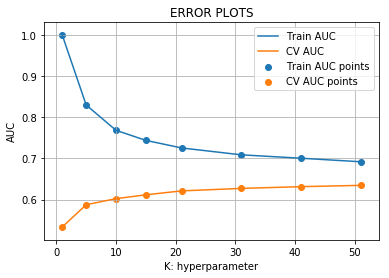

In [108]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a = []
b = []

K = [1, 5, 10, 15, 21, 31, 41, 51,]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_merge, y_train)

    y_train_pred =  neigh.predict_proba(X_train_merge)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv_merge)[:,1]
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


#### FROM ABOVE PLOT WE CAN SAY THAT THE BEST K WILL BE AROUND 28 BECAUSE AFTER THAT THE GRAPH OF CV_AUC IS ALMOST CONSTANT HENCE LET USE CONSIDER BEST K = 29

In [109]:
best_k_set_1 = 31


#### NOW USING THE BEST K VALUE RECEIVED FROM ABOVE WE WILL BE TRAINING OUR MODEL  

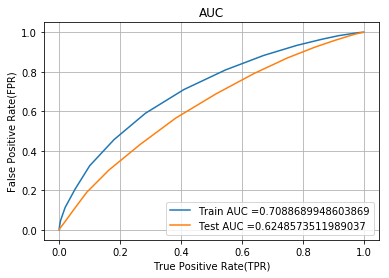

In [110]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_set_1,n_jobs = -4)
neigh.fit(X_train_merge, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  neigh.predict_proba(X_train_merge)[:,1]
y_test_pred =  neigh.predict_proba(X_test_merge)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

#### Creating the confusion matrix for the above train data results 

In [111]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def predict(proba, threshould, fpr, tpr):
    
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    predictions = []
    for i in proba:
        if i>=t:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

#### Creating the confusion matrix for train and test data

In [112]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))


Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24791603938644033 for threshold 0.742
[[ 3374  4052]
 [ 7946 33669]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24975469520310625 for threshold 0.774
[[ 2644  2815]
 [ 9518 21075]]


#### Showing the confusion matrix for train data visually

the maximum value of tpr*(1-fpr) 0.24791603938644033 for threshold 0.742


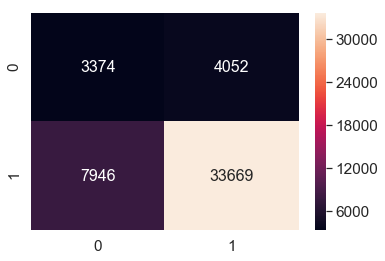

In [113]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(confusion_matrix(y_train,predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

### We can see that the True Positive values is the highest which is a good sign also.But the True Negative value is less which is not a good sign 

#### Showing the confusion matrix for the test data visually

the maximum value of tpr*(1-fpr) 0.24975469520310625 for threshold 0.774


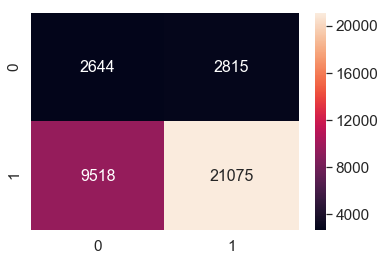

In [114]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_test = pd.DataFrame(confusion_matrix(y_test,predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_test, annot=True,annot_kws={"size": 16},fmt='g')# font size

#### From above we can say that we have large number of True positive but we also have a large number of False positive hence we can say that our model is a bit biased towards the positive class thats why it is predicting the positive class so many times

# Set 2 : categorical, numerical features + project_title(TFIDF) + preprocessed_essay (TFIDF)

###  Now we need to merge all the numerical vectors(categorical features,text features,numerical features) given above for set-2 which we created using different methods

In [123]:
from scipy.sparse import hstack

X_train_merge_set_2 = hstack((categories_one_hot_train,subcategories_one_hot_train,teacher_prefix_one_hot_train,project_grade_categories_one_hot_train,school_state_categories_one_hot_train,text_tfidf_train,project_title_tfidf_train,price_train,quantity_train,prev_projects_train)).tocsr()
X_test_merge_set_2 = hstack((categories_one_hot_test,subcategories_one_hot_test,teacher_prefix_one_hot_test,project_grade_categories_one_hot_test,school_state_categories_one_hot_test,text_tfidf_test,project_title_tfidf_test,price_test,quantity_test,prev_projects_test)).tocsr()
X_cv_merge_set_2 = hstack((categories_one_hot_cv,subcategories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_categories_one_hot_cv,school_state_categories_one_hot_cv,text_tfidf_cv,title_tfidf_cv,price_cv,quantity_cv,prev_projects_cv)).tocsr()

In [124]:
# this will be our finally created data matrix dimensions

print(X_train_merge_set_2.shape, y_train.shape)
print(X_test_merge_set_2.shape, y_test.shape)
print(X_cv_merge_set_2.shape, y_cv.shape)


(49041, 8102) (49041,)
(36052, 8102) (36052,)
(24155, 8102) (24155,)


# Hyper parameter Tuning (USING THE BASIC FOR LOOP METHOD GRIDSEARCH-CV CAN ALSO BE USED HERE)



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 12%|██████████▍                                                                        | 1/8 [04:18<30:07, 258.16s/it]

 25%|████████████████████▊                                                              | 2/8 [08:57<26:26, 264.47s/it]

 38%|███████████████████████████████▏                                                   | 3/8 [13:40<22:29, 269.96s/it]

 50%|█████████████████████████████████████████▌                                         | 4/8 [18:17<18:08, 272.11s/it]

 62%|███████████████████████████████████████████████████▉                               | 5/8 [22:50<13:36, 272.33s/it]

 75%|██████████████████████████████████████████████████████████████▎                    | 6/8 [27:20<09:03, 271.69s/it]

 88%|████████████████████████████████████████████████████████████████████████▋          | 7/8 [31:52<04:31, 271.70s/it]

100%|█████████████████████████

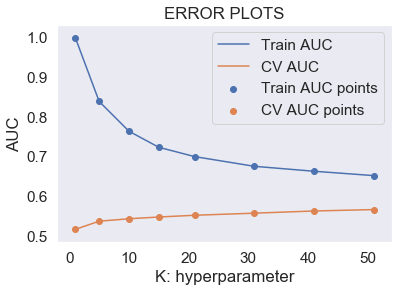

In [125]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a = []
b = []

K = [1, 5, 10, 15, 21, 31, 41, 51,]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_merge_set_2, y_train)

    y_train_pred =  neigh.predict_proba(X_train_merge_set_2)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv_merge_set_2)[:,1]
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


#### FROM ABOVE PLOT WE CAN SAY THAT THE BEST K WILL BE AROUND 35 BECAUSE AFTER THAT THE GRAPH OF CV_AUC IS ALMOST CONSTANT HENCE LET USE CONSIDER BEST K = 35

In [126]:
best_k_set_2 = 41

#### NOW USING THE BEST K VALUE RECEIVED FROM ABOVE WE WILL BE TRAINING OUR MODEL  

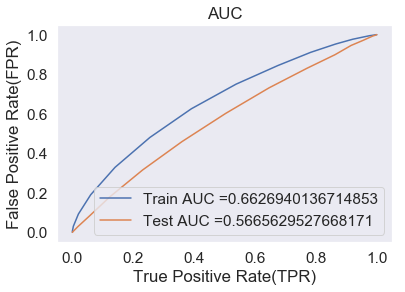

In [127]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_set_2)
neigh.fit(X_train_merge_set_2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  neigh.predict_proba(X_train_merge_set_2)[:,1]
y_test_pred =  neigh.predict_proba(X_test_merge_set_2)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

#### Creating the confusion matrix for the above  data results 

In [128]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24856813276940434 for threshold 0.829
[[ 3432  3994]
 [10419 31196]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24998589797327114 for threshold 0.854
[[ 2709  2750]
 [12186 18407]]


### Showing the train confusion matrix visually

the maximum value of tpr*(1-fpr) 0.24856813276940434 for threshold 0.829


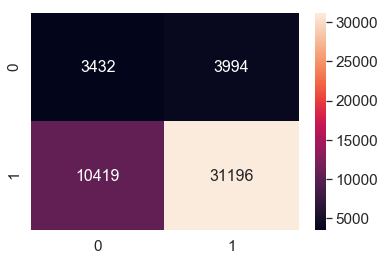

In [129]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_train, annot=True,annot_kws={"size": 16},fmt = 'g')# font size

#### Showing the confusion matrix for the test data visually

the maximum value of tpr*(1-fpr) 0.24998589797327114 for threshold 0.854


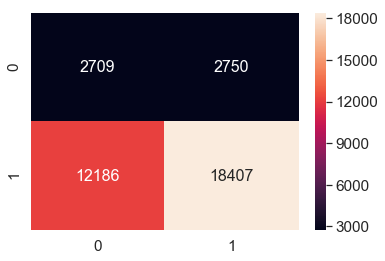

In [130]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_train = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_train, annot=True,annot_kws={"size": 16},fmt = 'g')# font size

### Here we can see that false positives and true positives are high in number it might also link towards the fact that our model is biased towards the positive class.

# Set 3 : categorical, numerical features + project_title(AVG W2V) + preprocessed_essay (AVG W2V)

In [131]:
from scipy.sparse import hstack

X_train_merge_set_3 = hstack((categories_one_hot_train,subcategories_one_hot_train,teacher_prefix_one_hot_train,project_grade_categories_one_hot_train,school_state_categories_one_hot_train,avg_w2v_vectors_train,avg_w2v_vectors_project_title_train,price_train,quantity_train,prev_projects_train)).tocsr()
X_test_merge_set_3 = hstack((categories_one_hot_test,subcategories_one_hot_test,teacher_prefix_one_hot_test,project_grade_categories_one_hot_test,school_state_categories_one_hot_test,avg_w2v_vectors_test,avg_w2v_vectors_project_title_test,price_test,quantity_test,prev_projects_test)).tocsr()
X_cv_merge_set_3 = hstack((categories_one_hot_cv,subcategories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_categories_one_hot_cv,school_state_categories_one_hot_cv,avg_w2v_vectors_cv,avg_w2v_vectors_project_title_cv,price_cv,quantity_cv,prev_projects_cv)).tocsr()

In [132]:
# this will be our finally created data matrix dimensions

print(X_train_merge_set_3.shape, y_train.shape)
print(X_test_merge_set_3.shape, y_test.shape)
print(X_cv_merge_set_3.shape, y_cv.shape)


(49041, 702) (49041,)
(36052, 702) (36052,)
(24155, 702) (24155,)


# Hyper parameter Tuning (USING THE BASIC FOR LOOP METHOD GRIDSEARCH-CV CAN ALSO BE USED HERE)



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 12%|█████████▊                                                                    | 1/8 [1:02:21<7:16:27, 3741.02s/it]

 25%|███████████████████▌                                                          | 2/8 [2:05:53<6:16:15, 3762.60s/it]

 38%|█████████████████████████████▎                                                | 3/8 [3:10:13<5:15:57, 3791.53s/it]

 50%|███████████████████████████████████████                                       | 4/8 [4:13:08<4:12:27, 3786.78s/it]

 62%|████████████████████████████████████████████████▏                            | 5/8 [10:16:03<7:39:09, 9183.31s/it]

 75%|█████████████████████████████████████████████████████████                   | 6/8 [16:44:54<7:27:34, 13427.49s/it]

 88%|██████████████████████████████████████████████████████████████████▌         | 7/8 [18:23:57<3:06:21, 11182.00s/it]

100%|█████████████████████████

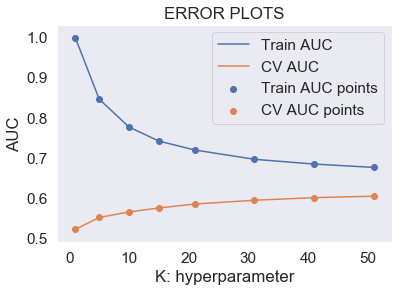

In [133]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a = []
b = []

K = [1, 5, 10, 15, 21, 31, 41, 51,]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_merge_set_3, y_train)

    y_train_pred =  neigh.predict_proba(X_train_merge_set_3)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv_merge_set_3)[:,1]
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


#### FROM ABOVE PLOT WE CAN SAY THAT THE BEST K WILL BE AROUND 35 BECAUSE AFTER THAT THE GRAPH OF CV_AUC IS ALMOST CONSTANT HENCE LET USE CONSIDER BEST K = 35

In [134]:
best_k_set_3 = 35

#### NOW USING THE BEST K VALUE RECEIVED FROM ABOVE WE WILL BE TRAINING OUR MODEL  

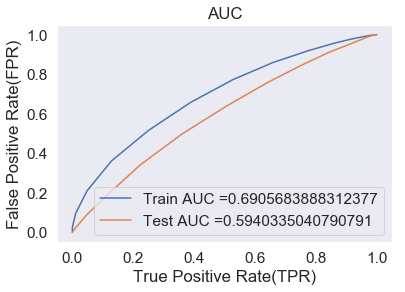

In [135]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_set_3)
neigh.fit(X_train_merge_set_3, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  neigh.predict_proba(X_train_merge_set_3)[:,1]
y_test_pred =  neigh.predict_proba(X_test_merge_set_3)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

#### Creating the confusion matrix for the above  data results 

In [136]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.24925272201839369 for threshold 0.829
[[ 3510  3916]
 [ 9472 32143]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.24990032945891405 for threshold 0.857
[[ 2675  2784]
 [10949 19644]]


### Showing the train confusion matrix visually

the maximum value of tpr*(1-fpr) 0.24925272201839369 for threshold 0.829


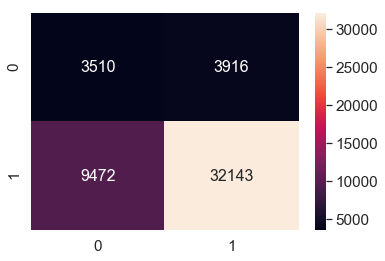

In [140]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_train, annot=True,annot_kws={"size": 16},fmt = 'g')# font size

### We can see above clearly that the number of False positives are more than the number of False Negatives

### Showing the test confusion matrix visually

the maximum value of tpr*(1-fpr) 0.24990032945891405 for threshold 0.857


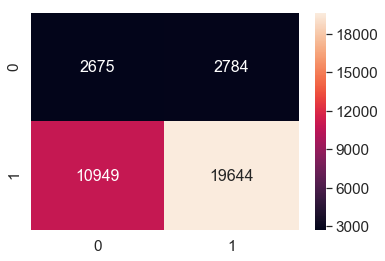

In [141]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_train = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_train, annot=True,annot_kws={"size": 16},fmt = 'g')# font size

### Here we can see that we are getting a lot of False positives and true positives which directly indicate that our model is biased towards the positive class.

# SET-4 Applying KNN brute force on TFIDF W2V

## categorical, numerical features + project_title(TFIDF W2V) + preprocessed_essay (TFIDF W2V)

In [185]:
from scipy.sparse import hstack

X_train_merge_set_4 = hstack((categories_one_hot_train,subcategories_one_hot_train,teacher_prefix_one_hot_train,project_grade_categories_one_hot_train,school_state_categories_one_hot_train,tfidf_w2v_vectors_text_train,tfidf_w2v_vectors_project_title_train,price_train,quantity_train,prev_projects_train)).tocsr()
X_test_merge_set_4 = hstack((categories_one_hot_test,subcategories_one_hot_test,teacher_prefix_one_hot_test,project_grade_categories_one_hot_test,school_state_categories_one_hot_test,tfidf_w2v_vectors_text_test,tfidf_w2v_vectors_project_title_test,price_test,quantity_test,prev_projects_test)).tocsr()
X_cv_merge_set_4 = hstack((categories_one_hot_cv,subcategories_one_hot_cv,teacher_prefix_one_hot_cv,project_grade_categories_one_hot_cv,school_state_categories_one_hot_cv,tfidf_w2v_vectors_text_cv,tfidf_w2v_vectors_project_title_cv,price_cv,quantity_cv,prev_projects_cv)).tocsr()

In [186]:
# this will be our finally created data matrix dimensions

print(X_train_merge_set_4.shape, y_train.shape)
print(X_test_merge_set_4.shape, y_test.shape)
print(X_cv_merge_set_4.shape,y_cv.shape)


(49041, 702) (49041,)
(36052, 702) (36052,)
(24155, 702) (24155,)


# Hyper parameter Tuning (USING THE BASIC FOR LOOP METHOD GRIDSEARCH-CV CAN ALSO BE USED HERE)



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 12%|█████████▊                                                                    | 1/8 [1:02:49<7:19:45, 3769.32s/it]

 25%|███████████████████▌                                                          | 2/8 [2:06:29<6:18:28, 3784.70s/it]

 38%|█████████████████████████████▎                                                | 3/8 [3:10:13<5:16:22, 3796.41s/it]

 50%|███████████████████████████████████████                                       | 4/8 [4:11:43<4:10:57, 3764.38s/it]

 62%|████████████████████████████████████████████████▊                             | 5/8 [5:12:47<3:06:42, 3734.19s/it]

 75%|██████████████████████████████████████████████████████████▌                   | 6/8 [6:16:34<2:05:24, 3762.06s/it]

 88%|████████████████████████████████████████████████████████████████████▎         | 7/8 [7:20:15<1:02:59, 3779.81s/it]

100%|█████████████████████████

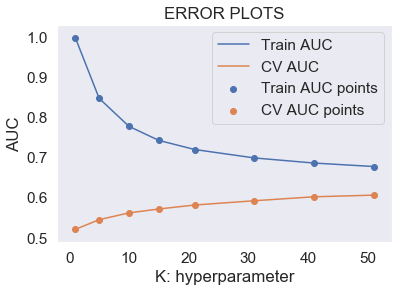

In [187]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a = []
b = []

K = [1, 5, 10, 15, 21, 31, 41, 51,]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_merge_set_4, y_train)

    y_train_pred =  neigh.predict_proba(X_train_merge_set_4)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv_merge_set_4)[:,1]
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()

plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


#### FROM ABOVE PLOT WE CAN SAY THAT THE BEST K WILL BE AROUND 35 BECAUSE AFTER THAT THE GRAPH OF CV_AUC IS ALMOST CONSTANT HENCE LET USE CONSIDER BEST K = 35

In [189]:
best_k_set_4 = 53

#### NOW USING THE BEST K VALUE RECEIVED FROM ABOVE WE WILL BE TRAINING OUR MODEL  

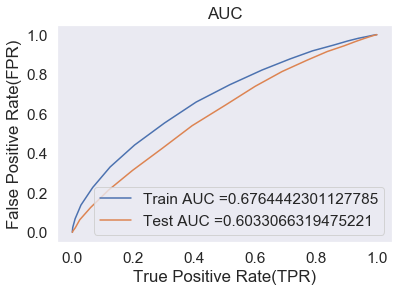

In [190]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_set_4,n_jobs = -1)
neigh.fit(X_train_merge_set_4, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  neigh.predict_proba(X_train_merge_set_4)[:,1]
y_test_pred =  neigh.predict_proba(X_test_merge_set_4)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

#### Creating confusion matrix for the above results 

In [191]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2497121069369317 for threshold 0.83
[[ 3587  3839]
 [10545 31070]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2499830121331791 for threshold 0.849
[[ 2707  2752]
 [10864 19729]]


### Showing the train confusion matrix visually

the maximum value of tpr*(1-fpr) 0.2497121069369317 for threshold 0.83


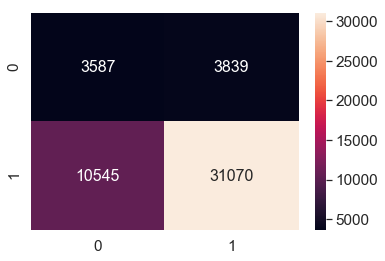

In [192]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_train, annot=True,annot_kws={"size": 16},fmt = 'g')# font size

### Showing the test confusion matrix visually

the maximum value of tpr*(1-fpr) 0.2499830121331791 for threshold 0.849


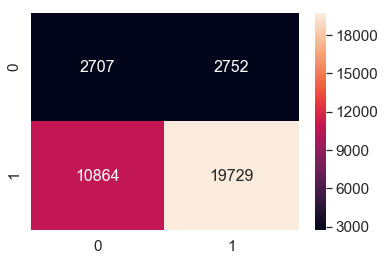

In [193]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_train = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_train, annot=True,annot_kws={"size": 16},fmt = 'g')# font size

### The model has good amount of true positives which is a good sign.But a lot of negative class points are classified as positive class which is not a good sign.

# Select Best K features On Set_2

In [195]:
print(X_train_merge_set_2.shape, y_train.shape)
print(X_test_merge_set_2.shape, y_test.shape)
print(X_cv_merge_set_2.shape, y_cv.shape)

(49041, 8102) (49041,)
(36052, 8102) (36052,)
(24155, 8102) (24155,)


#### Now above we have 8102 features out of which we want to select the best 2000 features

In [196]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [199]:
X_train_merge_set_2_best = SelectKBest(chi2, k=2000).fit_transform(X_train_merge_set_2,y_train)
X_test_merge_set_2_best = SelectKBest(chi2, k=2000).fit_transform(X_test_merge_set_2,y_test)
X_cv_merge_set_2_best = SelectKBest(chi2, k=2000).fit_transform(X_cv_merge_set_2,y_cv)

In [200]:
print(X_train_merge_set_2_best.shape)
print(X_test_merge_set_2_best.shape)
print(X_cv_merge_set_2_best.shape)


(49041, 2000)
(36052, 2000)
(24155, 2000)


# Hyper parameter Tuning for the best 2000 features (USING THE BASIC FOR LOOP METHOD GRIDSEARCH-CV CAN ALSO BE USED HERE)



  0%|                                                                                            | 0/8 [00:00<?, ?it/s]

 12%|██████████▍                                                                        | 1/8 [02:13<15:32, 133.28s/it]

 25%|████████████████████▊                                                              | 2/8 [04:45<13:53, 138.96s/it]

 38%|███████████████████████████████▏                                                   | 3/8 [07:17<11:54, 142.89s/it]

 50%|█████████████████████████████████████████▌                                         | 4/8 [09:50<09:43, 145.87s/it]

 62%|███████████████████████████████████████████████████▉                               | 5/8 [12:23<07:24, 148.08s/it]

 75%|██████████████████████████████████████████████████████████████▎                    | 6/8 [14:58<05:00, 150.02s/it]

 88%|████████████████████████████████████████████████████████████████████████▋          | 7/8 [17:30<02:30, 150.85s/it]

100%|█████████████████████████

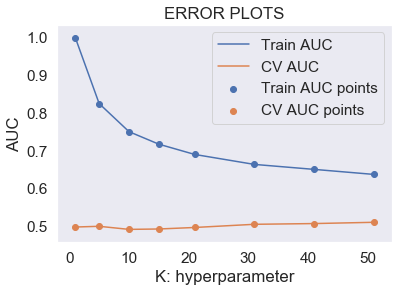

In [201]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

"""
y_true : array, shape = [n_samples] or [n_samples, n_classes]
True binary labels or binary label indicators.

y_score : array, shape = [n_samples] or [n_samples, n_classes]
Target scores, can either be probability estimates of the positive class, confidence values, or non-thresholded measure of
decisions (as returned by “decision_function” on some classifiers). 
For binary y_true, y_score is supposed to be the score of the class with greater label.

"""

train_auc = []
cv_auc = []
a = []
b = []

K = [1, 5, 10, 15, 21, 31, 41, 51]

for i in tqdm(K):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_merge_set_2_best, y_train)

    y_train_pred =  neigh.predict_proba(X_train_merge_set_2_best)[:,1]
    y_cv_pred =  neigh.predict_proba(X_cv_merge_set_2_best)[:,1]
    

    # roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
    # not the predicted outputs        
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    cv_auc.append(roc_auc_score(y_cv, y_cv_pred))
    a.append(y_train_pred)
    b.append(y_cv_pred)

plt.plot(K, train_auc, label='Train AUC')
plt.plot(K, cv_auc, label='CV AUC')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()


## From above we can easily see that for lower values of k we have large AUC on training data while we have Low AUC of the test data hence we can say that our model falls under the category of overfitting for those lower values of k.

#### Choosing the best k from above plot

In [202]:
best_k_selecKBest = 49

#### NOW USING THE BEST K VALUE RECEIVED FROM ABOVE WE WILL BE TRAINING OUR MODEL  

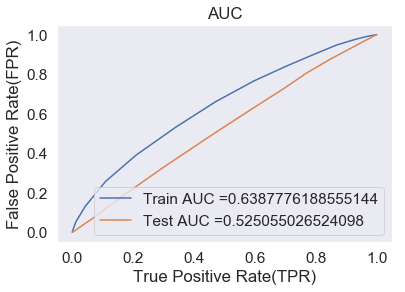

In [203]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=best_k_selecKBest)
neigh.fit(X_train_merge_set_2_best, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred =  neigh.predict_proba(X_train_merge_set_2_best)[:,1]
y_test_pred =  neigh.predict_proba(X_test_merge_set_2_best)[:,1]

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("True Positive Rate(TPR)")
plt.ylabel("False Positive Rate(FPR)")
plt.title("AUC")
plt.grid()
plt.show()

### Auc values received here for the test data are the worst it means that working on only 2000 features was not a good idea.

### Now getting the confusion matrix for the train and test data based on above plots

In [204]:
print("="*100)
from sklearn.metrics import confusion_matrix
print("Train confusion matrix")
print(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))

Train confusion matrix
the maximum value of tpr*(1-fpr) 0.2491539469166972 for threshold 0.837
[[ 3929  3497]
 [14100 27515]]
Test confusion matrix
the maximum value of tpr*(1-fpr) 0.2483979476844841 for threshold 0.878
[[ 3822  1637]
 [20501 10092]]


## visually plotting the confusion matrix for train data

the maximum value of tpr*(1-fpr) 0.2491539469166972 for threshold 0.837


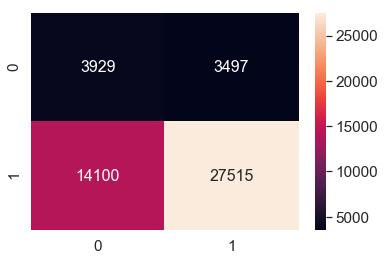

In [205]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_train = pd.DataFrame(confusion_matrix(y_train, predict(y_train_pred, tr_thresholds, train_fpr, train_fpr)), range(2),
                  range(2))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_train, annot=True,annot_kws={"size": 16},fmt = 'g')# font size

## Visually plotting the confusion matrix for test data

the maximum value of tpr*(1-fpr) 0.2483979476844841 for threshold 0.878


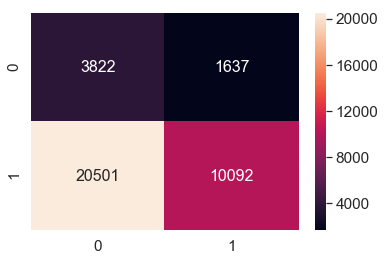

In [206]:
# Code for this segment from here -->> https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm_train = pd.DataFrame(confusion_matrix(y_test, predict(y_test_pred, tr_thresholds, test_fpr, test_fpr)))
#plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm_train, annot=True,annot_kws={"size": 16},fmt = 'g')# font size

### Cannot find much of good predictions and also the model is giving the worse AUC as compared to previous models which we did in different sets.

# Conclusions

In [207]:
# Compare all your models using Prettytable library
# http://zetcode.com/python/prettytable/

from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Vectorizer Technique", "Model", "Hyper Parameter K Value", "AUC"]

x.add_row(["BOW", "Brute", 31, 0.62])
x.add_row(["TFIDF", "Brute", 41, 0.56])
x.add_row(["AVG W2V", "Brute", 35, 0.59])
x.add_row(["TFIDF W2V", "Brute", 53, 0.60])

print(x)

+----------------------+-------+-------------------------+------+
| Vectorizer Technique | Model | Hyper Parameter K Value | AUC  |
+----------------------+-------+-------------------------+------+
|         BOW          | Brute |            31           | 0.62 |
|        TFIDF         | Brute |            41           | 0.56 |
|       AVG W2V        | Brute |            35           | 0.59 |
|      TFIDF W2V       | Brute |            53           | 0.6  |
+----------------------+-------+-------------------------+------+


### Looks like k in the range of 31-41 will work good based on the trainings for different vectorizations techniques.